In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib.pyplot inline

UsageError: Line magic function `%matplotlib.pyplot` not found.


# 1. Import Data

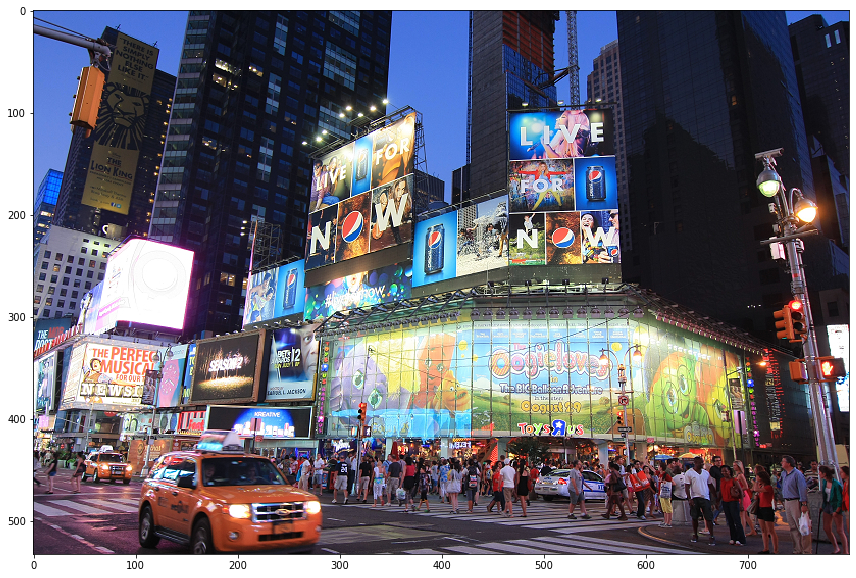

In [13]:
canvas = cv2.imread('./input/TimeSquare.jpg')
canvas2 = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(canvas2)

In [8]:
corners = np.load('1.npy')
corners

array([[275, 143],
       [373, 100],
       [267, 254],
       [370, 225]])

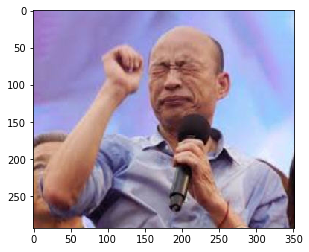

In [11]:
img = cv2.imread('./input/idiot.jpg')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [14]:
h, w, ch = img.shape
orig_corner = np.array([[0, 0], [w-1, 0], [0, h-1], [w-1, h-1]])
orig_corner

array([[  0,   0],
       [351,   0],
       [  0, 292],
       [351, 292]])

In [15]:
u=orig_corner #source corner
v=corners # target corner

## 2. Solving for homographies: 
* A . H  = b
* AT . A . H = AT . b
* H = AT . b

<img style="float: left;" src="1.jpg" width="60%">

In [16]:
A = np.array([[u[0][0], u[0][1], 1, 0, 0, 0, -1 * u[0][0] * v[0][0], -1 * u[0][1] * v[0][0]],
                  [0, 0, 0, u[0][0], u[0][1], 1, -1 * u[0][0] * v[0][1], -1 * u[0][1] * v[0][1]],
                  [u[1][0], u[1][1], 1, 0, 0, 0, -1 * u[1][0] * v[1][0], -1 * u[1][1] * v[1][0]],
                  [0, 0, 0, u[1][0], u[1][1], 1, -1 * u[1][0] * v[1][1], -1 * u[1][1] * v[1][1]],
                  [u[2][0], u[2][1], 1, 0, 0, 0, -1 * u[2][0] * v[2][0], -1 * u[2][1] * v[2][0]],
                  [0, 0, 0, u[2][0], u[2][1], 1, -1 * u[2][0] * v[2][1], -1 * u[2][1] * v[2][1]],
                  [u[3][0], u[3][1], 1, 0, 0, 0, -1 * u[3][0] * v[3][0], -1 * u[3][1] * v[3][0]],
                  [0, 0, 0, u[3][0], u[3][1], 1, -1 * u[3][0] * v[3][1], -1 * u[3][1] * v[3][1]]
                ])

In [17]:
b = np.array([[v[0][0]],
                  [v[0][1]],
                  [v[1][0]],
                  [v[1][1]],
                  [v[2][0]],
                  [v[2][1]],
                  [v[3][0]],
                  [v[3][1]]
                ])

### Using the least-squares solution to solve the homograph

In [18]:
tmp = np.dot(np.linalg.inv(A), b)

In [19]:
H = np.array([[tmp[0][0], tmp[1][0], tmp[2][0]],
                  [tmp[3][0], tmp[4][0], tmp[5][0]],
                  [tmp[6][0], tmp[7][0], 1]])
H

array([[ 1.47323167e-01, -7.50899281e-02,  2.75000000e+02],
       [-1.57863453e-01,  3.34766433e-01,  1.43000000e+02],
       [-3.53563303e-04, -1.78624224e-04,  1.00000000e+00]])

## 3. Warp
<img style="float: left;" src="3.jpg" width="60%">

In [21]:
h, w, ch

(293, 352, 3)

In [22]:
h, w, ch = img.shape
matrix = H
for i in range(h):
    for j in range(w):
        tmp2 = np.dot(matrix, np.array([[j, i, 1]]).T)
        x, y = int(tmp2[0][0] / tmp2[2][0]), int(tmp2[1][0] / tmp2[2][0])
        canvas[y][x] = img[i][j]

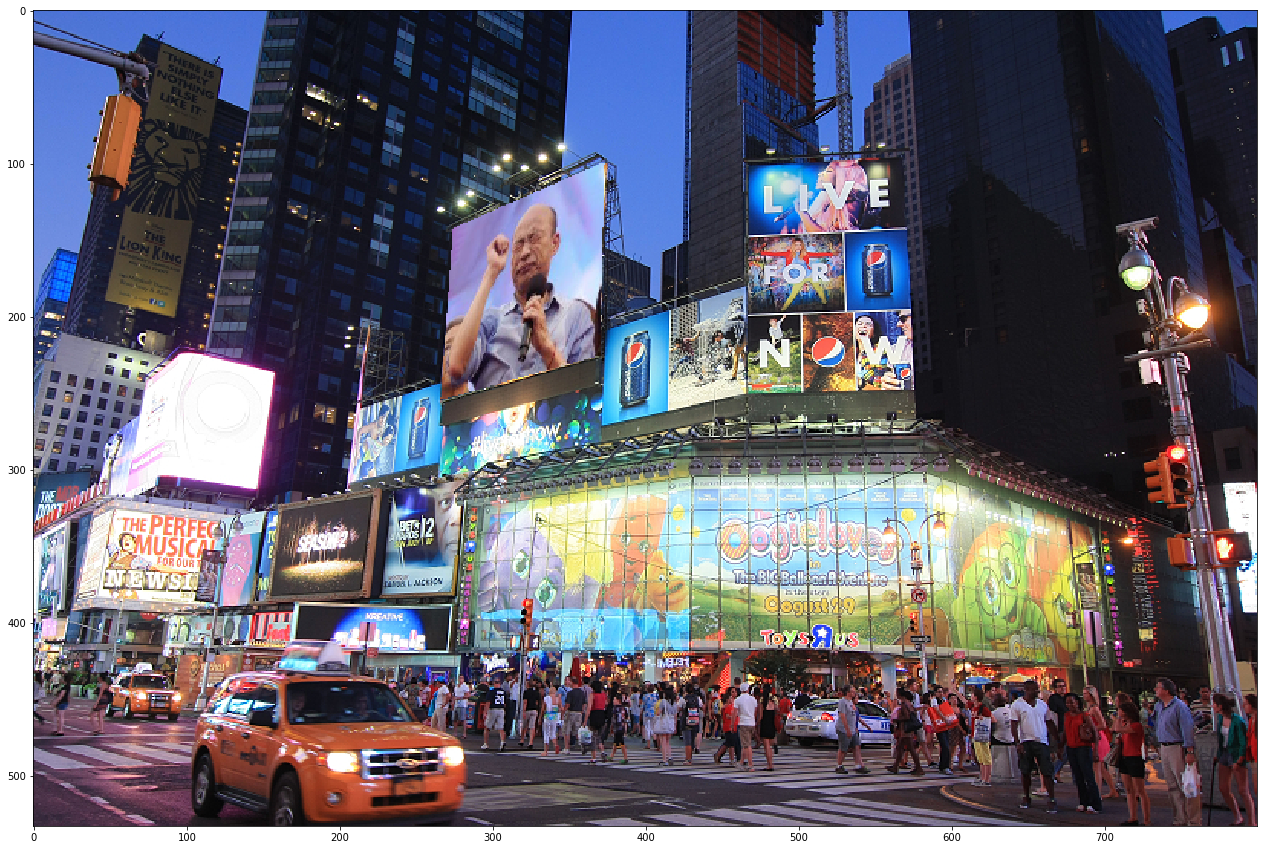

In [23]:
canvas2 = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(30,15))
plt.imshow(canvas2)

## 4. Do it again

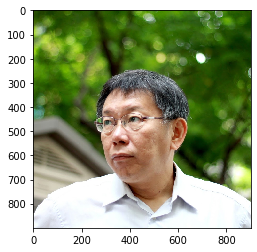

In [25]:
corners = np.load('2.npy')
img = cv2.imread('./input/kp.jpg')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [26]:
h, w, ch = img.shape
orig_corner = np.array([[0, 0], [w-1, 0], [0, h-1], [w-1, h-1]])
u=orig_corner #source corner
v=corners # target corner

A = np.array([[u[0][0], u[0][1], 1, 0, 0, 0, -1 * u[0][0] * v[0][0], -1 * u[0][1] * v[0][0]],
                  [0, 0, 0, u[0][0], u[0][1], 1, -1 * u[0][0] * v[0][1], -1 * u[0][1] * v[0][1]],
                  [u[1][0], u[1][1], 1, 0, 0, 0, -1 * u[1][0] * v[1][0], -1 * u[1][1] * v[1][0]],
                  [0, 0, 0, u[1][0], u[1][1], 1, -1 * u[1][0] * v[1][1], -1 * u[1][1] * v[1][1]],
                  [u[2][0], u[2][1], 1, 0, 0, 0, -1 * u[2][0] * v[2][0], -1 * u[2][1] * v[2][0]],
                  [0, 0, 0, u[2][0], u[2][1], 1, -1 * u[2][0] * v[2][1], -1 * u[2][1] * v[2][1]],
                  [u[3][0], u[3][1], 1, 0, 0, 0, -1 * u[3][0] * v[3][0], -1 * u[3][1] * v[3][0]],
                  [0, 0, 0, u[3][0], u[3][1], 1, -1 * u[3][0] * v[3][1], -1 * u[3][1] * v[3][1]]
                ])

b = np.array([[v[0][0]],
                  [v[0][1]],
                  [v[1][0]],
                  [v[1][1]],
                  [v[2][0]],
                  [v[2][1]],
                  [v[3][0]],
                  [v[3][1]]
                ])

tmp = np.dot(np.linalg.inv(A), b)

H = np.array([[tmp[0][0], tmp[1][0], tmp[2][0]],
                  [tmp[3][0], tmp[4][0], tmp[5][0]],
                  [tmp[6][0], tmp[7][0], 1]])

matrix = H
for i in range(h):
    for j in range(w):
        tmp2 = np.dot(matrix, np.array([[j, i, 1]]).T)
        x, y = int(tmp2[0][0] / tmp2[2][0]), int(tmp2[1][0] / tmp2[2][0])
        canvas[y][x] = img[i][j]

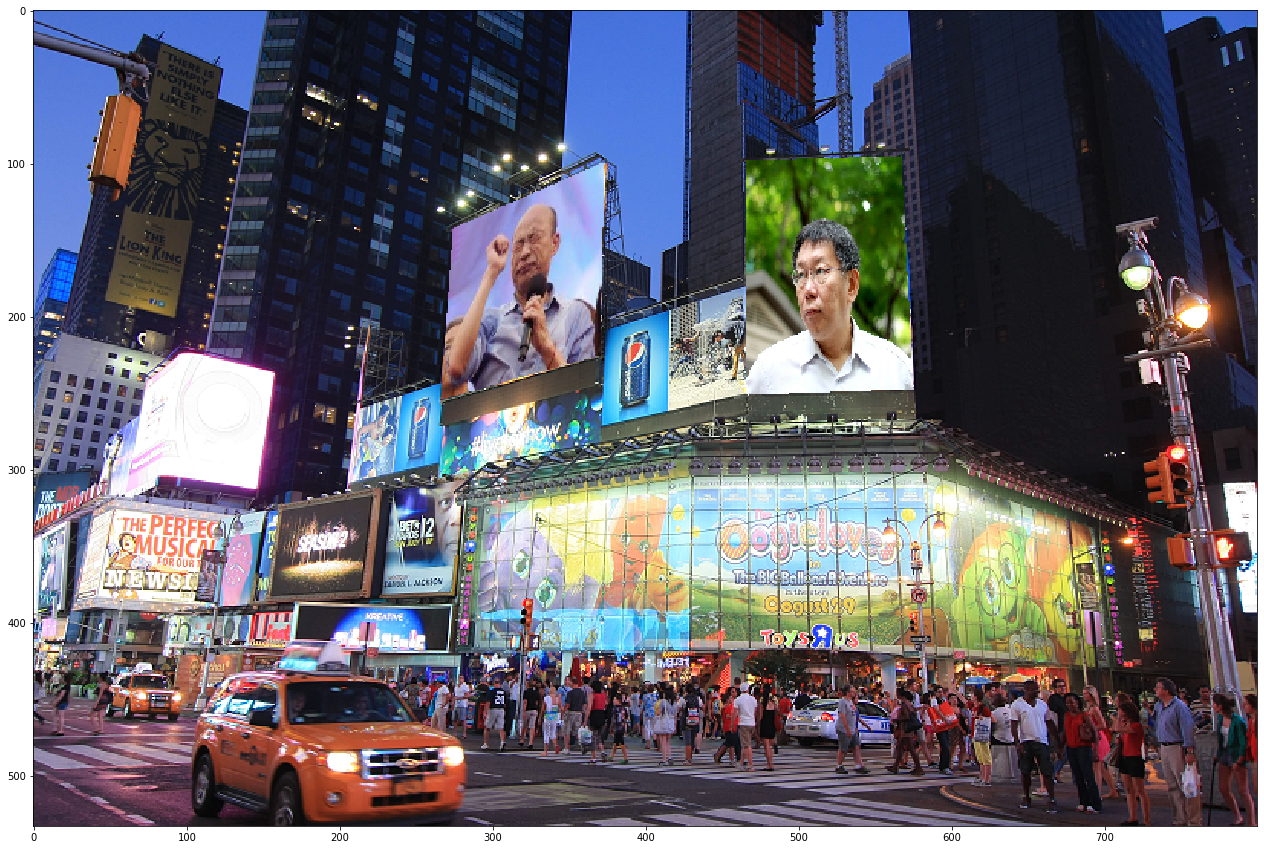

In [27]:
canvas2 = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(30,15))
plt.imshow(canvas2)

In [28]:
cv2.imwrite('TimeSequare.png', canvas)

True